In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv("aprior.csv")
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,status,order_date,state
0,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Complete,2023-12-06 13:35:00.000000 UTC,Amazonas
1,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Shipped,2021-01-30 13:35:00.000000 UTC,Amazonas
2,6651,9565,Shadowline Petals 54 Coat (71280),Cancelled,2020-11-21 08:29:00.000000 UTC,Nordrhein-Westfalen
3,6651,9565,Shadowline Petals 54 Coat (71280),Complete,2020-06-29 08:29:00.000000 UTC,Nordrhein-Westfalen
4,10098,14533,Satin Piping Maternity/Nursing Pajama Set,Processing,2022-04-02 14:45:00.000000 UTC,Minnesota
...,...,...,...,...,...,...
3995,703,1007,Ed Garments Women's Economy Vest. 7490,Cancelled,2024-02-01 07:41:00.000000 UTC,Pennsylvania
3996,703,1007,Ed Garments Women's Economy Vest. 7490,Complete,2021-12-24 07:41:00.000000 UTC,Pennsylvania
3997,703,1007,Ed Garments Women's Economy Vest. 7490,Shipped,2021-07-13 07:41:00.000000 UTC,Pennsylvania
3998,1095,1560,New Womens Coco Print Hoodie Coat Sweatshirt T...,Cancelled,2023-05-26 12:17:00.000000 UTC,Principado de Asturias


DATA PREPARATION

In [3]:
data=df.head(1000)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,status,order_date,state
0,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Complete,2023-12-06 13:35:00.000000 UTC,Amazonas
1,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Shipped,2021-01-30 13:35:00.000000 UTC,Amazonas
2,6651,9565,Shadowline Petals 54 Coat (71280),Cancelled,2020-11-21 08:29:00.000000 UTC,Nordrhein-Westfalen
3,6651,9565,Shadowline Petals 54 Coat (71280),Complete,2020-06-29 08:29:00.000000 UTC,Nordrhein-Westfalen
4,10098,14533,Satin Piping Maternity/Nursing Pajama Set,Processing,2022-04-02 14:45:00.000000 UTC,Minnesota
...,...,...,...,...,...,...
995,3825,5457,Allegra K Woman Solid Black Elastic Waist Bagg...,Shipped,2024-04-02 16:22:00.000000 UTC,Guangdong
996,6500,9353,Angelina Sheer Nylon/Spandex Pantyhose with Fl...,Returned,2020-06-24 12:44:00.000000 UTC,Illinois
997,6560,9437,July Women Black Fishnet Stay-Up Thigh High St...,Returned,2023-11-02 15:33:00.000000 UTC,Shanghai
998,13432,19321,Calvin Klein Sportswear Men's Long Sleeve 1/4 ...,Returned,2022-03-29 09:11:00.000000 UTC,Guangdong


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      1000 non-null   int64 
 1   product_id    1000 non-null   int64 
 2   product_name  1000 non-null   object
 3   status        1000 non-null   object
 4   order_date    1000 non-null   object
 5   state         1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
data['status'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


status
Shipped       322
Complete      234
Processing    194
Cancelled     132
Returned      118
Name: count, dtype: int64

In [6]:
#data = data[data['status']!='Shipped']
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 6)

In [7]:
data['product_id'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


485

In [8]:
# Converting product_id to a string since we wont be performing any computation on this feature
data['product_id'] = data['product_id'].astype(str)
data.sample()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-8ff71c5cc25f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_id'] = data['product_id'].astype(str)


,order_id,product_id,product_name,status,order_date,state
123,6594,9486,LOCOMO Women Faux Leather Ankle Length Footles...,Returned,2022-03-04 14:12:00.000000 UTC,Santa Catarina


In [9]:
data['uniqueTransaction'] = data['product_id']+ '_' + data['product_name']
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-7037abfa365f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['uniqueTransaction'] = data['product_id']+ '_' + data['product_name']


,order_id,product_id,product_name,status,order_date,state,uniqueTransaction
0,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Complete,2023-12-06 13:35:00.000000 UTC,Amazonas,26497_Tommy Hilfiger Men's Poplin Plaid Sleep ...
1,18405,26497,Tommy Hilfiger Men's Poplin Plaid Sleep Pant,Shipped,2021-01-30 13:35:00.000000 UTC,Amazonas,26497_Tommy Hilfiger Men's Poplin Plaid Sleep ...
2,6651,9565,Shadowline Petals 54 Coat (71280),Cancelled,2020-11-21 08:29:00.000000 UTC,Nordrhein-Westfalen,9565_Shadowline Petals 54 Coat (71280)
3,6651,9565,Shadowline Petals 54 Coat (71280),Complete,2020-06-29 08:29:00.000000 UTC,Nordrhein-Westfalen,9565_Shadowline Petals 54 Coat (71280)
4,10098,14533,Satin Piping Maternity/Nursing Pajama Set,Processing,2022-04-02 14:45:00.000000 UTC,Minnesota,14533_Satin Piping Maternity/Nursing Pajama Set


In [10]:
# checking cusrtomer orders
customer_check = data[data['order_id'] == 14798].sort_values('order_date')
customer_check

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,product_name,status,order_date,state,uniqueTransaction
6,14798,21325,Company 81 Men's Slim Straight Fit Denim Jean,Complete,2024-02-10 11:58:00.000000 UTC,Guangdong,21325_Company 81 Men's Slim Straight Fit Denim...
7,14798,21325,Company 81 Men's Slim Straight Fit Denim Jean,Processing,2024-04-02 11:58:00.000000 UTC,Guangdong,21325_Company 81 Men's Slim Straight Fit Denim...


MARKET BASKET ANALYSIS

In [11]:
basket = pd.crosstab(data['order_id'], data['product_name'])

basket.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,10-Pack Hanes Over-the-Calf Tube 180/10 White 6-12,2 Button Modern Fit Tuxedo,2 Pc polka Dot Babydoll With Ruffle Trim Padded Underwire Cups Adjustable Shoulder Straps,2(x)ist Men's Xtreme Range No Show Brief,2B Norah Sweetheart Peplum Dress,2B Paradise Breeze Staci Maxi,2XU Men's Compression Recovery Sock,6 Pairs mens 100% cotton ribbed socks.,6 pairs mens 100% cotton black socks,626 BLUE Big & Tall Cargo Shorts,...,Wrangler Men's Rugged Wear Relaxed Straight Fit,YMI Stretch Bootcut Jeans W/ Button-Flap Pockets [P362075],YogaColors Crystal Tri-Blend Racerback Tank Top,adidas Women's Adifit Capri Pant,adidas Women's Marathon 10 Grete Short 2,allen allen Women's Long Sleeve Hoodie With Coverstitch,ecko unltd. Men's Trademark Hoody,neff Juniors Perf,neff Men's Daily Shell Hood,parke & ronen Men's Angeleno 2-Inch Print Swim Trunk
order_id,,,,,,,,,,,,,,,,,,,,,
4764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
basket = basket.apply(pd.to_numeric, errors='coerce')
# Replace NaN values with 0 (if needed)
basket.fillna(0, inplace=True)

basket_sets = basket.applymap(lambda x: 1 if x > 1 else 0)
basket_sets.sample()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


product_name,10-Pack Hanes Over-the-Calf Tube 180/10 White 6-12,2 Button Modern Fit Tuxedo,2 Pc polka Dot Babydoll With Ruffle Trim Padded Underwire Cups Adjustable Shoulder Straps,2(x)ist Men's Xtreme Range No Show Brief,2B Norah Sweetheart Peplum Dress,2B Paradise Breeze Staci Maxi,2XU Men's Compression Recovery Sock,6 Pairs mens 100% cotton ribbed socks.,6 pairs mens 100% cotton black socks,626 BLUE Big & Tall Cargo Shorts,...,Wrangler Men's Rugged Wear Relaxed Straight Fit,YMI Stretch Bootcut Jeans W/ Button-Flap Pockets [P362075],YogaColors Crystal Tri-Blend Racerback Tank Top,adidas Women's Adifit Capri Pant,adidas Women's Marathon 10 Grete Short 2,allen allen Women's Long Sleeve Hoodie With Coverstitch,ecko unltd. Men's Trademark Hoody,neff Juniors Perf,neff Men's Daily Shell Hood,parke & ronen Men's Angeleno 2-Inch Print Swim Trunk
order_id,,,,,,,,,,,,,,,,,,,,,
1881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# using the boolean DataFrame with the apriori algorithm

basket_sets = pd.DataFrame(basket_sets)
frequent_items = apriori(basket_sets, min_support=0.0001, use_colnames=True)

frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.002066,(10-Pack Hanes Over-the-Calf Tube 180/10 White...
1,0.002066,(2 Button Modern Fit Tuxedo)
2,0.002066,(2(x)ist Men's Xtreme Range No Show Brief)
3,0.002066,(2B Norah Sweetheart Peplum Dress)
4,0.002066,(6 Pairs mens 100% cotton ribbed socks.)
...,...,...
296,0.002066,(Wrangler Men's Rugged Wear Relaxed Straight Fit)
297,0.002066,(allen allen Women's Long Sleeve Hoodie With C...
298,0.002066,(ecko unltd. Men's Trademark Hoody)
299,0.002066,(neff Men's Daily Shell Hood)


In [14]:
rules = association_rules(frequent_items, metric='lift')
rules.sort_values('zhangs_metric',ascending= False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Men's New Liquid Metallic Football Bikini Swi...,(Rufskin - Parati -Rufskin Parati- Mesh Sunga ...,0.002066,0.002066,0.002066,1.0,484.0,0.002062,inf,1.0
1,(Rufskin - Parati -Rufskin Parati- Mesh Sunga ...,(Men's New Liquid Metallic Football Bikini Swi...,0.002066,0.002066,0.002066,1.0,484.0,0.002062,inf,1.0


 VISUALIZATION

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


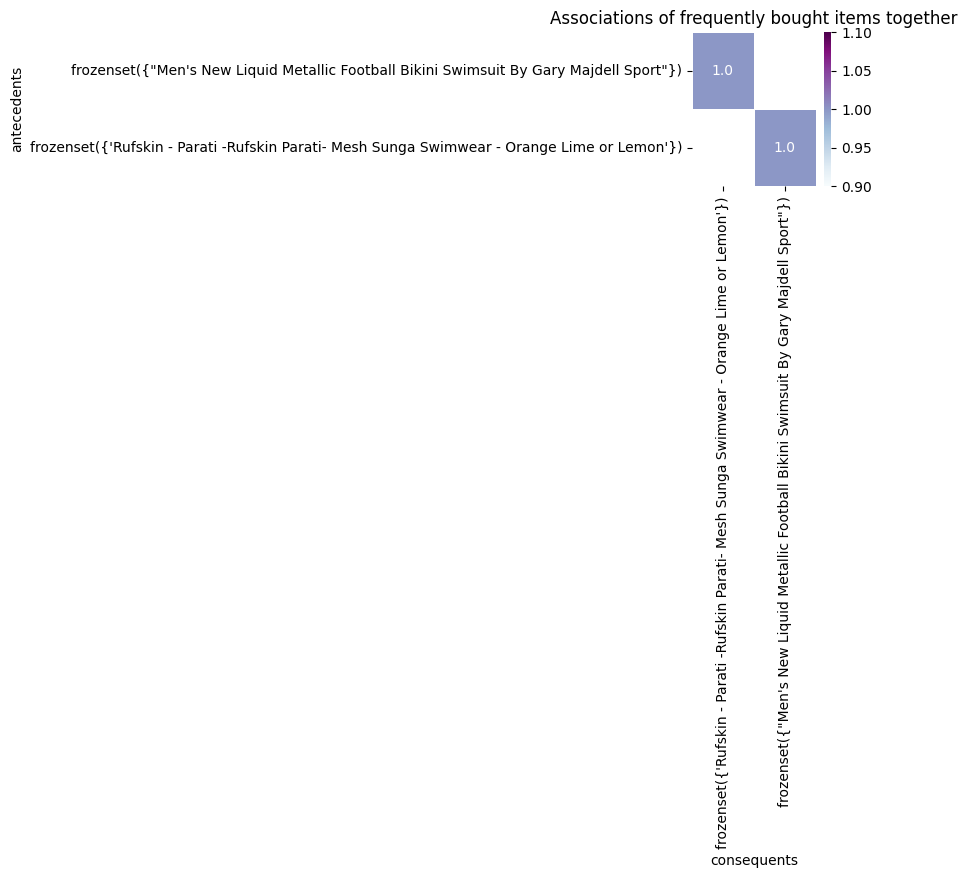

In [15]:
#creating a matrix of product association
#Zhang metric was used because of the combinaion of antecedents,consequents,support,lift,leverage and conviction.
#it combines the strengths of lift and conviction. A higher value of Zhang’s metric indicates a stronger association between the antecedent and the consequent.
product_association=rules.pivot(index='antecedents',columns='consequents',values='zhangs_metric')
#create a heatmap
plt.figure(figsize=(2,2))
sns.heatmap(product_association,annot=True, cmap='BuPu',fmt=".1f", linewidths=.5)
plt.title('Associations of frequently bought items together')
plt.show()

In [16]:
# Taking pairs with positive Zhang's metric in a separate dataframe
positive_pair=rules[rules['zhangs_metric']>0]
positive_pair.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Men's New Liquid Metallic Football Bikini Swi...,(Rufskin - Parati -Rufskin Parati- Mesh Sunga ...,0.002066,0.002066,0.002066,1.0,484.0,0.002062,inf,1.0
1,(Rufskin - Parati -Rufskin Parati- Mesh Sunga ...,(Men's New Liquid Metallic Football Bikini Swi...,0.002066,0.002066,0.002066,1.0,484.0,0.002062,inf,1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


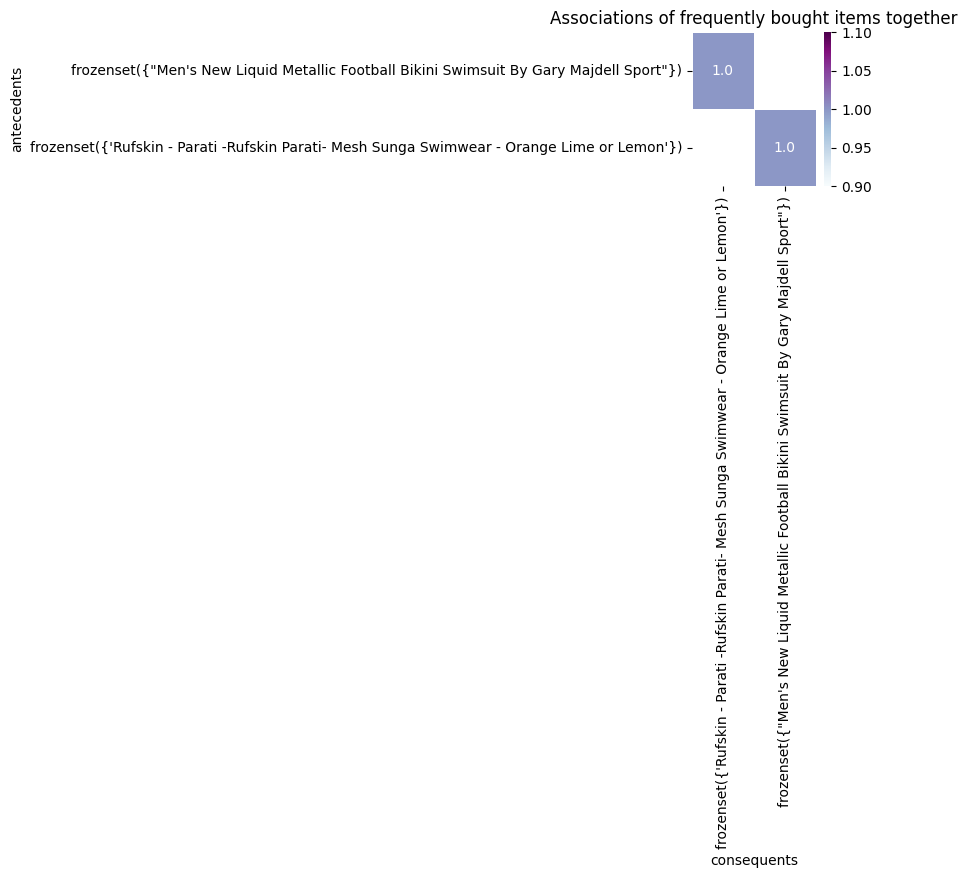

In [17]:
positive_pair=rules.pivot(index='antecedents',columns='consequents',values='zhangs_metric')
#create a heatmap
plt.figure(figsize=(2,2))
sns.heatmap(positive_pair,annot=True, cmap='BuPu',fmt=".1f", linewidths=.5)
plt.title('Associations of frequently bought items together')
plt.show()

**RECCOMENDATIONS**
 For product bundling, cross-selling, or marketing strategies based on the analysis.

Based on the above analysis, when a customer purchases the product 'Men's New Liquid Metallic Football Bikini Swimsuit by Gary Machdell sport', another product which is 'Rufskin - Parati -Rufskin Parati- Mesh Sunga swimwear-Orange Lime or Lemon' is mostlikely to be purchased along side.

There is positve association between both products and the below reccomandstion should be taking into condsideration;

1. Since these two products have a perfect association,  i will consider bundling them together as a "Summer Essentials Kit" or a "Beach Ready Bundle". This could attract customers who are looking for coordinated swimwear sets.

2. Cross-selling the products When customers purchase the Rufskin - Parati swimwear,  i can suggest adding the Metallic Football Bikini Swimsuit as a complementary item. This can be highlighted during the checkout process or through targeted email campaigns.
3. Creating Special Promotions for Bundled Purchases, Offer discounts or special promotions for customers who purchase both items together. For example, "Buy One Get One 50% Off" or "Free Beach Towel with Purchase of Both Products". This encourages customers to buy both items and increases the overall value of their purchase.
4. Highlighting the Complementary Nature of the Products:  i will emphasize the compatibility and style synergy between the Men's New Liquid Metallic Football Bikini Swimsuit and Rufskin - Parati -Rufskin Parati- Mesh Sunga in the marketing campaigns by Using visuals and messaging that showcase how well these items pair together for a complete beach or poolside look.
5. Segmented Marketing Campaigns, i can segment the customer base based on their past purchases or preferences. Target those who have previously bought swimwear or related products with personalized recommendations for the bundled items. Tailor the messaging to highlight the benefits of purchasing both products together.



***CONCLUSION***

By implementing these strategies, the company can leverage the association between these products to ***increase sales, enhance customer satisfaction, and drive overall business growth***.